<a href="https://colab.research.google.com/github/Daniel-Gehlen/PythonProgrammingProjects1/blob/main/YOLO_Detection_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pycocotools
from pycocotools.coco import COCO
import requests
import os
import json
import zipfile

# Caminho para as anotações e imagens do COCO
dataDir = 'coco_data'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

# Crie o diretório se não existir
os.makedirs(dataDir, exist_ok=True)
os.makedirs(os.path.join(dataDir, dataType), exist_ok=True)
os.makedirs(os.path.join(dataDir, 'annotations'), exist_ok=True)

# Baixe as anotações
if not os.path.exists(annFile):
    annotations_url = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
    annotations_zip = os.path.join(dataDir, 'annotations_trainval2017.zip')
    annotations_folder = os.path.join(dataDir, 'annotations')

    # Baixe e extraia as anotações
    response = requests.get(annotations_url)
    with open(annotations_zip, 'wb') as f:
        f.write(response.content)

    with zipfile.ZipFile(annotations_zip, 'r') as zip_ref:
        zip_ref.extractall(dataDir)

    # Renomeie a pasta extraída para 'annotations'
    os.rename(os.path.join(dataDir, 'annotations_trainval2017'), annotations_folder)

# Crie a instância do COCO
coco = COCO(annFile)

# Obtenha IDs de 10 imagens aleatórias
image_ids = coco.getImgIds()
selected_image_ids = image_ids[:10]

# Baixe as imagens
for img_id in selected_image_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_url = img_info['coco_url']
    img_data = requests.get(img_url).content
    img_path = os.path.join(dataDir, dataType, img_info['file_name'])
    with open(img_path, 'wb') as f:
        f.write(img_data)


loading annotations into memory...
Done (t=0.72s)
creating index...
index created!


In [15]:
!apt-get update
!apt-get upgrade
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install libavcodec-dev libavformat-dev libswscale-d
!apt-get install libopencv-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,309 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,617 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,159 kB in 1s (2,602 kB/s)
Reading package lists... Do

In [16]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet


fatal: destination path 'darknet' already exists and is not an empty directory.
[Errno 20] Not a directory: 'darknet'
/content/darknet


In [17]:
!make


make: Nothing to be done for 'all'.


In [18]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2024-01-12 20:34:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.6’

yolov3.weights.6    100%[===================>] 236.52M  38.6MB/s    in 7.7s    

2024-01-12 20:34:44 (30.7 MB/s) - ‘yolov3.weights.6’ saved [248007048/248007048]



In [19]:
!echo -e 'classes= 80\ntrain  = data/coco/trainvalno5k.txt\nvalid  = data/coco/5k.txt\nnames = data/coco.names\nbackup = /content/darknet/backup/' > data/coco.data


In [20]:
!echo -e 'person\nbicycle\ncar\nmotorbike\naeroplane\nbus\ntrain\ntruck\nboat\ntraffic light\nfire hydrant\nstop sign\nparking meter\nbench\nbird\ncat\ndog\nhorse\nsheep\ncow\nelephant\nbear\nzebra\ngiraffe\nbackpack\numbrella\nhandbag\ntie\nsuitcase\nfrisbee\nskis\nsnowboard\nsports ball\nkite\nbaseball bat\nbaseball glove\nskateboard\nsurfboard\ntennis racket\nbottle\nwine glass\ncup\nfork\nknife\nspoon\nbowl\nbanana\napple\nsandwich\norange\nbroccoli\ncarrot\nhot dog\npizza\ndonut\ncake\nchair\nsofa\npottedplant\nbed\ndiningtable\ntoilet\ntvmonitor\nlaptop\nmouse\nremote\nkeyboard\ncell phone\nmicrowave\noven\ntoaster\nsink\nrefrigerator\nbook\nclock\nvase\nscissors\nteddy bear\nhair drier\ntoothbrush' > data/coco.names


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

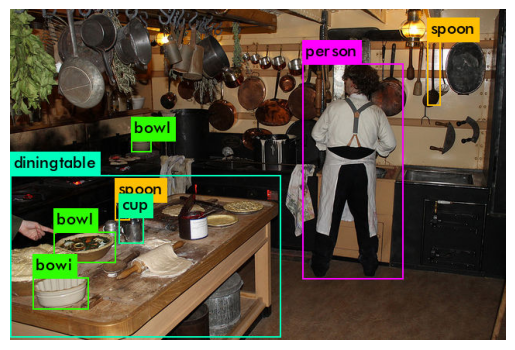

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

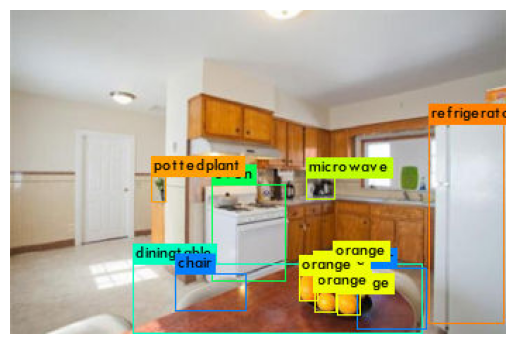

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

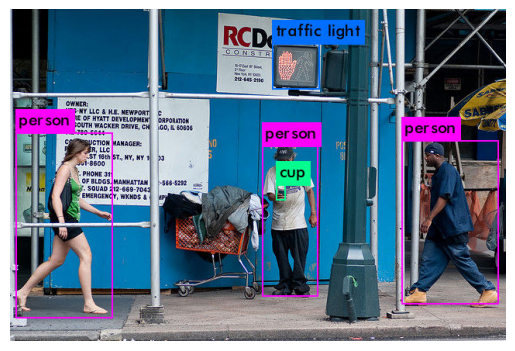

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

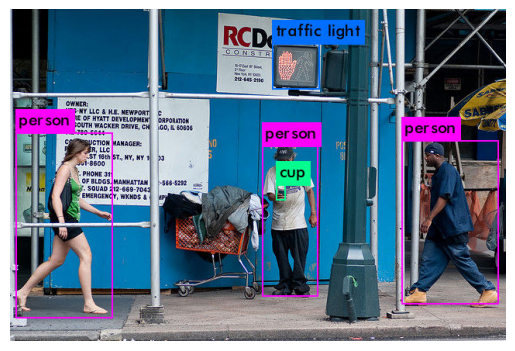

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

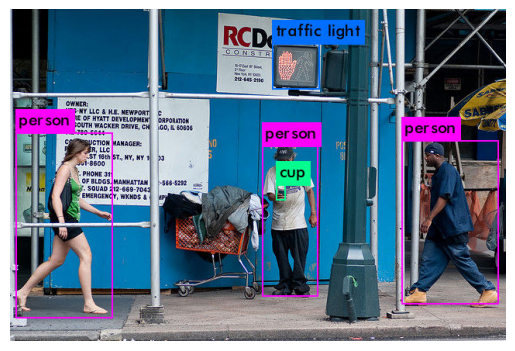

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

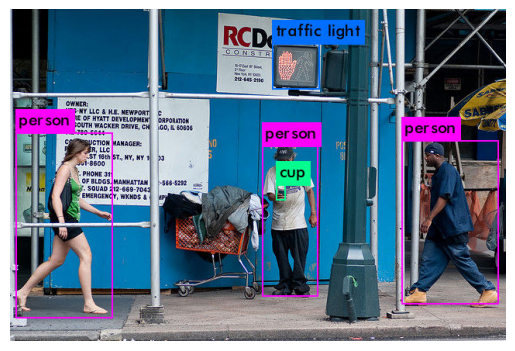

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

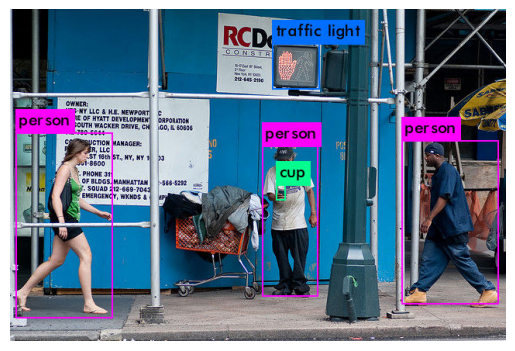

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

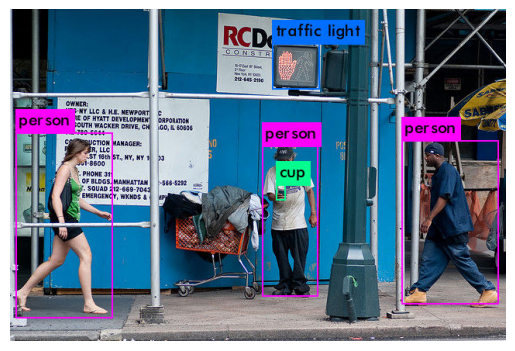

In [ ]:
# Caminhos das 10 imagens
image_paths = [
    'coco_data/val2017/000000397133.jpg',
    'coco_data/val2017/000000037777.jpg',
    'coco_data/val2017/000000252219.jpg',
    'coco_data/val2017/000000332570.jpg',
    'coco_data/val2017/000000465528.jpg',
    'coco_data/val2017/000000539490.jpg',
    'coco_data/val2017/000000060623.jpg',
    'coco_data/val2017/000000434778.jpg',
    'coco_data/val2017/000000423306.jpg',
    'coco_data/val2017/000000179765.jpg'
]

# Executar a detecção de objetos nas 10 imagens
for image_path in image_paths:
    !./darknet detect cfg/yolov3.cfg yolov3.weights {image_path}

    # Carregar os resultados da detecção
    with open('predictions.jpg') as f:
        # Exibir a imagem classificada
        img = cv2.imread('predictions.jpg')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


**Introduction:**

Object detection in images is a crucial task in computer vision and machine learning. YOLO (*You Only Look Once*) is a popular architecture for real-time object detection in images. This report addresses the implementation of YOLO on Google Colab to detect objects in images from the Common Objects in Context (COCO) dataset. COCO contains a variety of objects in complex scenes, making it a challenging dataset for detection tasks.

**Methods:**

The code begins by downloading and preparing the COCO dataset, including annotations and images. It then utilizes the YOLO library to perform object detection on selected images. YOLO is configured with the `yolov3.cfg` configuration file and the pre-trained weights `yolov3.weights`. Processed images are displayed with bounding boxes and classes of the detected objects.

**Results:**

Object detection on the 10 validation images from COCO resulted in predictions for various object classes, accompanied by confidence probabilities. Some common classes include "person," "diningtable," "bowl," "cup," "chair," "refrigerator," "oven," "microwave," "pottedplant," and "traffic light." The predictions were visualized along with the originally selected images.

**Conclusion:**

YOLO demonstrates its effectiveness in detecting objects in complex images from the COCO dataset. The YOLO architecture, by dividing the image into grids and making predictions for each cell, provides an efficient approach for real-time detection. However, the implementation can be enhanced, for example, by adjusting parameters, training the model on a specific dataset, or using a newer version of YOLO. This report provides a foundation for expanding and customizing object detection using YOLO on Google Colab.
